# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

- I first changed the dtypes of the following columns to category since they were misclasified: Pclass, Survived, Gender, Cabin, Embarked

In [4]:
def changedtype(df, col_name, dtype):  
    df[col_name] = df[col_name].astype(dtype)
    return df[col_name]

changedtype(titanic,"Pclass", "category")
changedtype(titanic,"Survived","category")
changedtype(titanic,"Gender","category")
changedtype(titanic,"Cabin","category")
changedtype(titanic,"Embarked","category")

titanic.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Gender         category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [5]:
# your code here- numerical variable
titanic.select_dtypes(['int64', 'float64']).head(0)

,PassengerId,Age,SibSp,Parch,Fare


In [6]:
#your code here- categorical variable
titanic.select_dtypes('category').head(0)

,Survived,Pclass,Gender,Cabin,Embarked


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [7]:
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

Text(0.5, 1.0, 'Age Histogram')

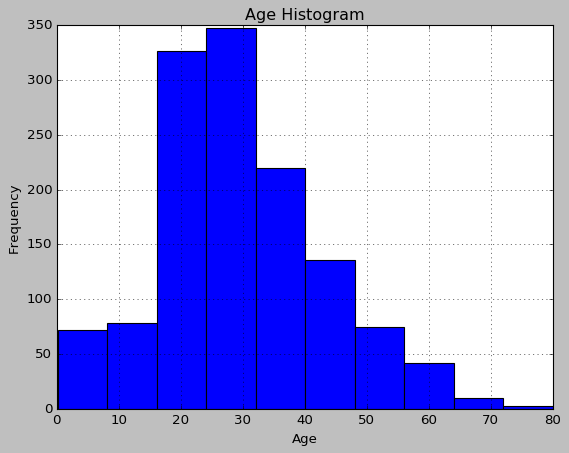

In [8]:
titanic['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Age Histogram')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

Text(0.5, 1.0, 'Age Histogram 50')

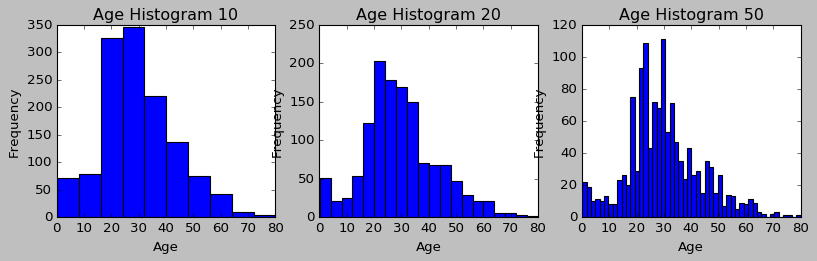

In [9]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
x = titanic['Age']

axes[0].hist(x, bins=10)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Histogram 10')

axes[1].hist(x, bins=20)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Histogram 20')

axes[2].hist(x, bins=50)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Age Histogram 50')

#### Whether the bin size affects your plot? Why?
- The bin size affects the plot because the more bins the more segregated the data is.
    - In the Histogram with 50 bins it's tougher to find a pattern than in the histogram with 10 bins

#### Use seaborn to show the distribution of the column `Age`

Text(0.5, 1.0, 'Age Distribution')

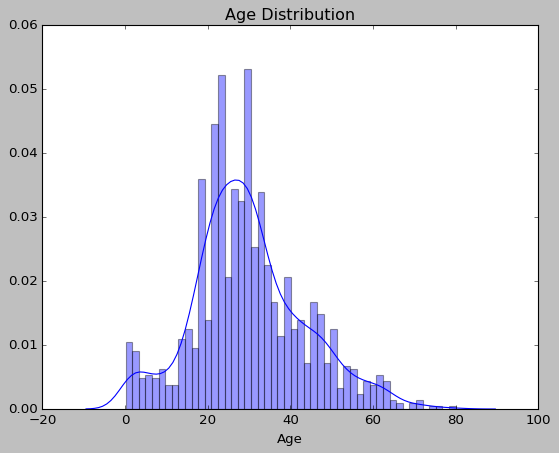

In [10]:
sns.distplot(titanic['Age'], bins=50, kde=True)
plt.title('Age Distribution')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0.5, 1.0, 'Gender Bar Graph')

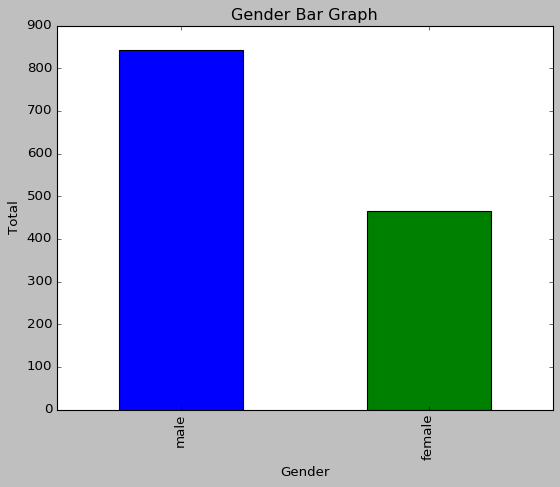

In [11]:
# your code here- 1st way
titanic['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Total")
plt.title('Gender Bar Graph')

Text(0.5, 1.0, 'Gender Bar Graph')

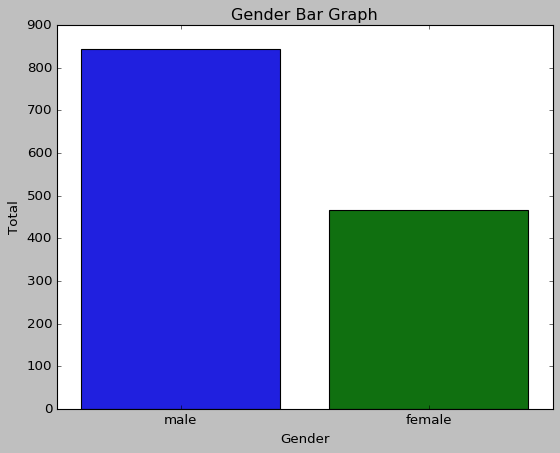

In [12]:
# your code here- 2nd way
sns.barplot(x = titanic.Gender.unique(), y = titanic.Gender.value_counts())
plt.xlabel("Gender")
plt.ylabel("Total")
plt.title('Gender Bar Graph')

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0.5, 1.0, 'Pclass Bar Graph')

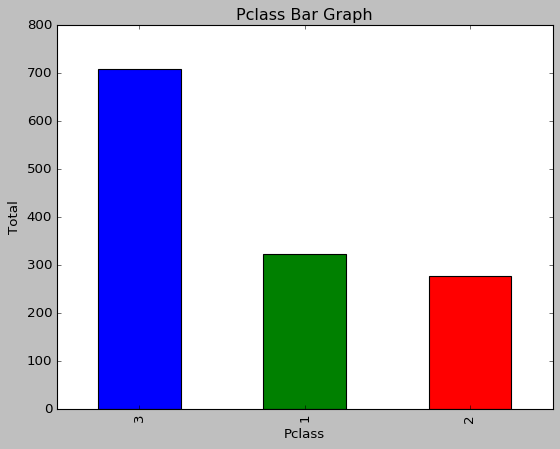

In [14]:
titanic['Pclass'].value_counts().plot(kind='bar')
plt.xlabel("Pclass")
plt.ylabel("Total")
plt.title('Pclass Bar Graph')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

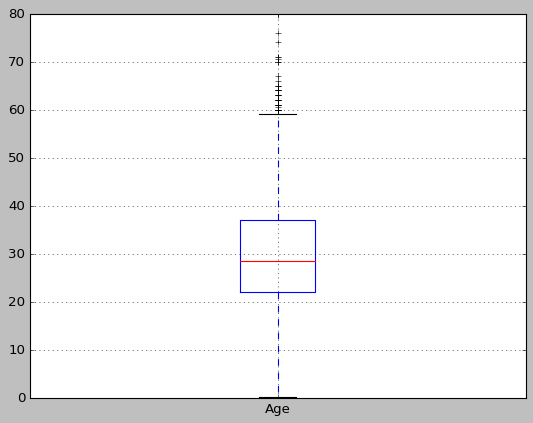

In [15]:
titanic.boxplot(column='Age')

#### What does the previous plot tell you about the feature `Age`? Comment.
- The median is around 29 years old
- 50% of the passengers are between 23 and 37 years old
- Age is skewed since it has a bunch of "older" passengers

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

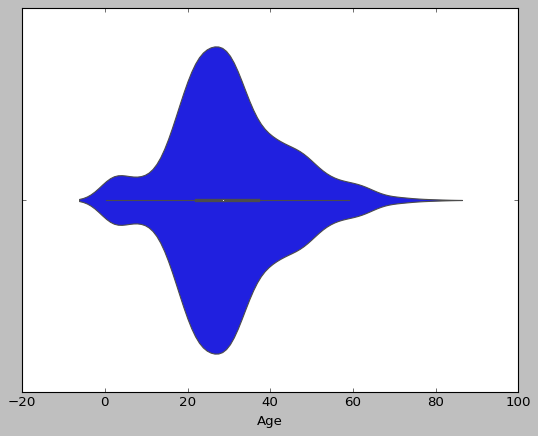

In [17]:
sns.violinplot(titanic.Age)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.
- We can see that more or less age has a normal distribution, it's a bit skewed to the right

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

Text(0.5, 1.0, 'Fare vs. Age')

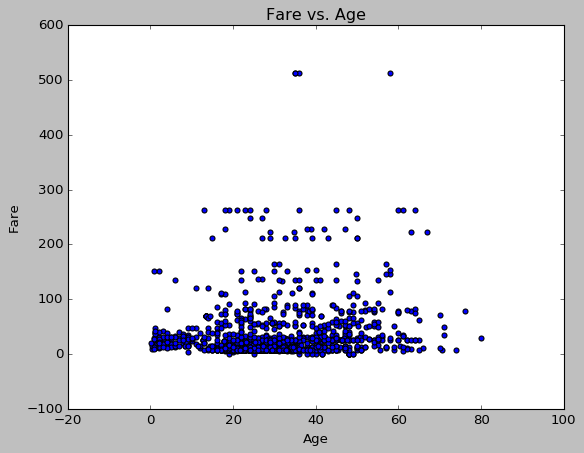

In [18]:
x = titanic.Age
y = titanic.Fare
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Fare vs. Age')

Text(0.5, 1.0, 'Fare vs. Age')

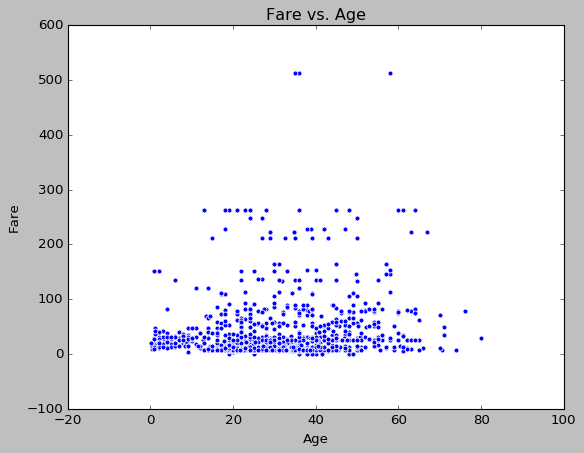

In [31]:
# your code-2nd way
x = titanic.Age
y = titanic.Fare
sns.scatterplot(x,y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Fare vs. Age')

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

TypeError: 'AxesSubplot' object is not subscriptable

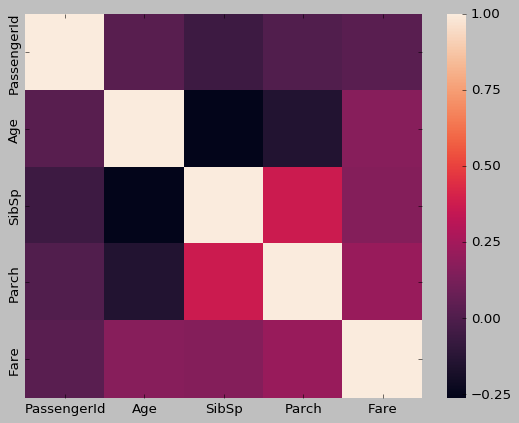

In [43]:
sns.heatmap(titanic.corr())

#### According to the previous plot, what are the most correlated feature? Comment.
- Parch and SibSp have the highest correlation 

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

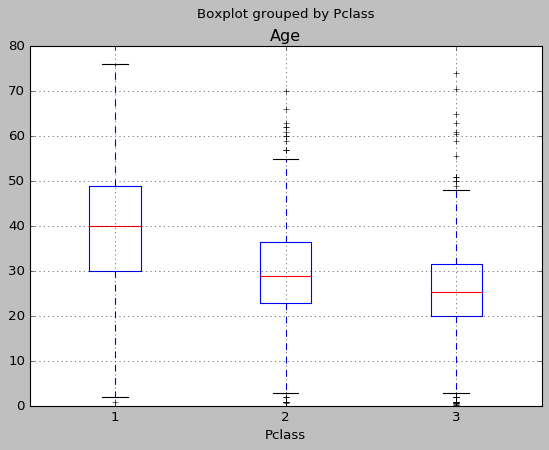

In [49]:
titanic.boxplot(column='Age', by='Pclass')

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

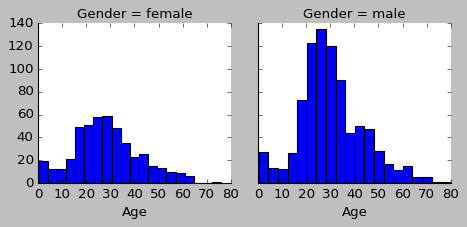

In [61]:
sns.FacetGrid(titanic, col="Gender").map(plt.hist, "Age", bins=20)